In [157]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [158]:

df = pd.read_csv('./assets/train.csv')


## Análise de dados: Titanic

In [159]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [160]:
df.info()
df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


## Pre-processing

Remoção de features sem valor

In [161]:
df.drop(columns=['Cabin', 'Ticket', 'PassengerId', 'Embarked'], inplace=True)

In [162]:
df['Sex'] = df['Sex'].map({'male': 0, 'female': 1})
df['family_members'] = df['Parch'] + df['SibSp']

SibSp: Irmãos e conjuges. Parch: Pais e filhos. Somatório é o total de parentes 

In [163]:
df.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,family_members
0,0,3,"Braund, Mr. Owen Harris",0,22.0,1,0,7.2500,1
1,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,38.0,1,0,71.2833,1
2,1,3,"Heikkinen, Miss. Laina",1,26.0,0,0,7.9250,0
3,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,35.0,1,0,53.1000,1
4,0,3,"Allen, Mr. William Henry",0,35.0,0,0,8.0500,0


### Searching for correlations to fill empty age values.

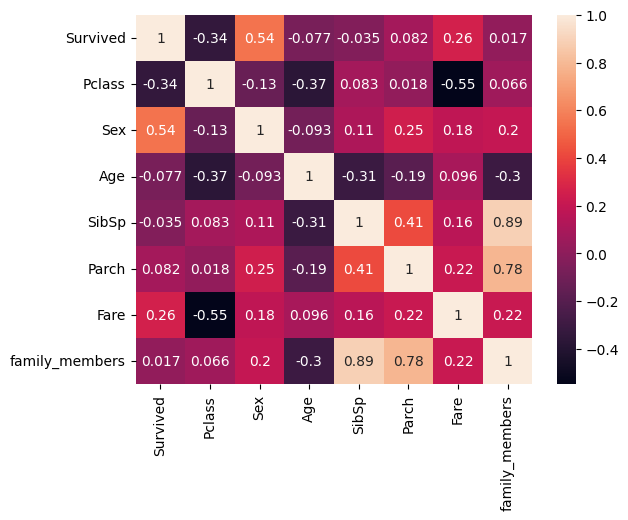

In [164]:
corr = df.select_dtypes(include=['number']).corr()
sns.heatmap(corr, annot=True)
plt.show()

In [165]:
df.groupby(['Pclass', 'Sex', 'family_members'])['Age'].median()

Pclass  Sex  family_members
1       0    0                 45.00
             1                 37.00
             2                 49.00
             3                 11.00
             5                 41.50
        1    0                 32.50
             1                 35.00
             2                 39.00
             3                 19.50
             4                 19.50
             5                 23.50
2       0    0                 30.00
             1                 32.50
             2                 19.00
             3                 24.00
        1    0                 32.25
             1                 28.00
             2                 24.50
             3                 24.00
             4                 54.00
             5                 24.00
3       0    0                 27.00
             1                 25.00
             2                 20.00
             3                 13.50
             4                  9.00
          

In [246]:
df['Age'] = df.Age.fillna(
    df.groupby(['Pclass', 'Sex', 'family_members'])['Age'].transform('median')
    )

<Axes: ylabel='Frequency'>

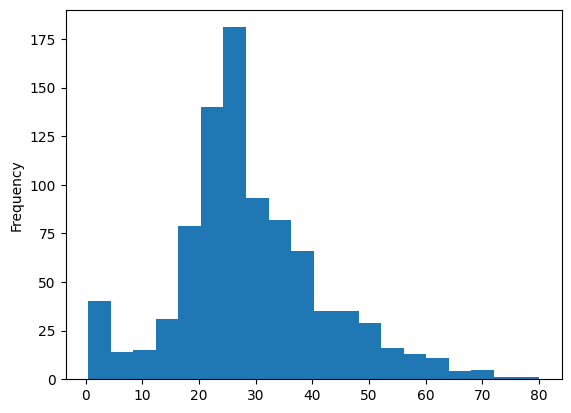

In [247]:
df.Age.plot.hist(bins=20)

### Look at the Fare outliers

<Axes: >

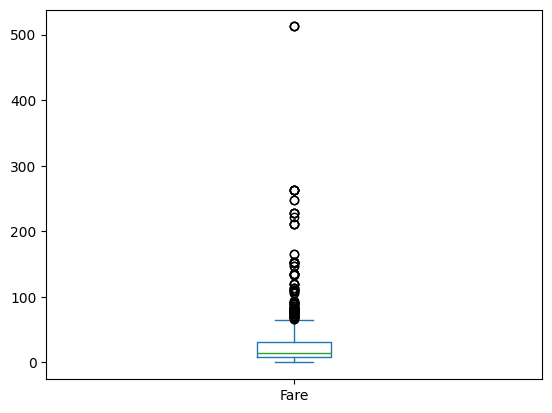

In [168]:
df.Fare.plot.box()

In [169]:
# Remove the biggest value
#df.loc[df['Fare'] == df['Fare'].max(), 'Fare'] = df.Fare.median()

In [170]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Survived        891 non-null    int64  
 1   Pclass          891 non-null    int64  
 2   Name            891 non-null    object 
 3   Sex             891 non-null    int64  
 4   Age             891 non-null    float64
 5   SibSp           891 non-null    int64  
 6   Parch           891 non-null    int64  
 7   Fare            891 non-null    float64
 8   family_members  891 non-null    int64  
dtypes: float64(2), int64(6), object(1)
memory usage: 62.8+ KB


## Data exploration

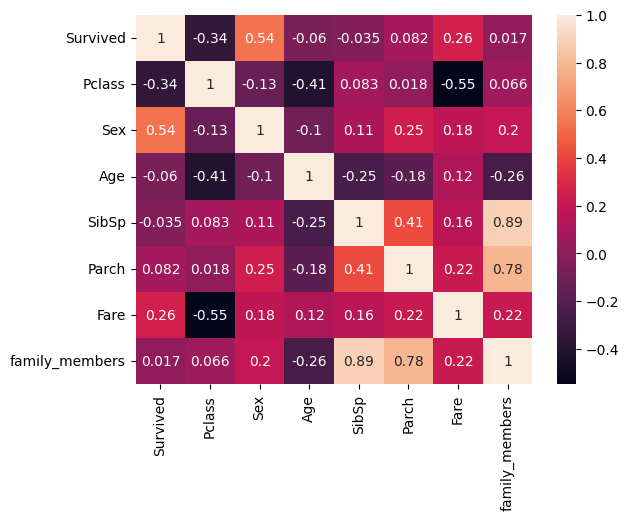

In [231]:
corr = df.select_dtypes(include=['number']).corr()
sns.heatmap(corr, annot=True)
plt.show()

Investigações:
* Pessoas que viajaram em família tem maiores chances de sobreviver?
* Aqueles com maior pretígio social (medido pela classe de passagem) tem mais chances de sobreviver?
* Como exatamente se dá a correlação entre o sexo e a sobrevivência.

<Axes: xlabel='family_members', ylabel='count'>

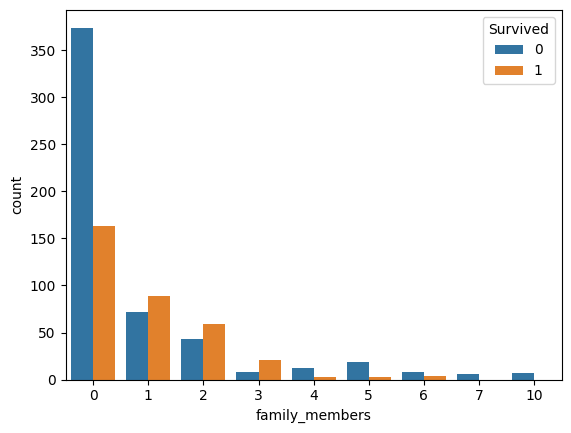

In [232]:
sns.countplot(x='family_members', hue='Survived', data=df)

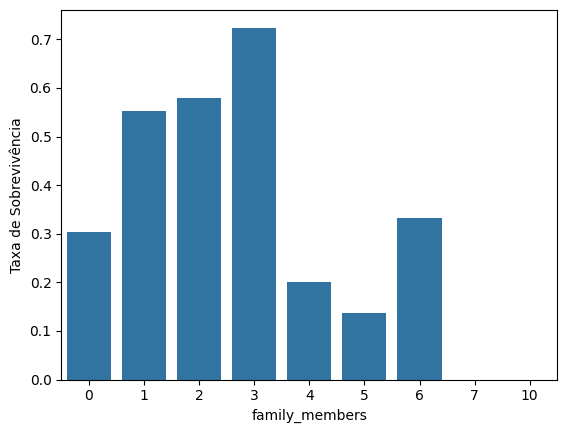

In [233]:
survival_rate = df.groupby('family_members')['Survived'].mean()

sns.barplot(data=survival_rate)
plt.ylabel('Taxa de Sobrevivência')
plt.xlabel('family_members')
plt.show()

Hipótese:
Se uma pessoa viajou acompanhada, possívelmente é uma criança. É provavel também que as mães tenham acompanhado seus filhos, já que a prioridade do resgate é sempre para mulheres e crianças.

In [234]:
kids = df.loc[(df['Parch'] > 0) &
 (df['Age'] <= 14), 'Survived']
mothers = df.loc[(df['Parch'] > 0) & (df['Sex']==1) &  # Possíveis mães
       (df['Age'] >= 17)]['Survived']
dads = df.loc[(df['Parch'] > 0) & (df['Sex']==0) &  # Possíveis pais
       (df['Age'] >= 17)]['Survived']


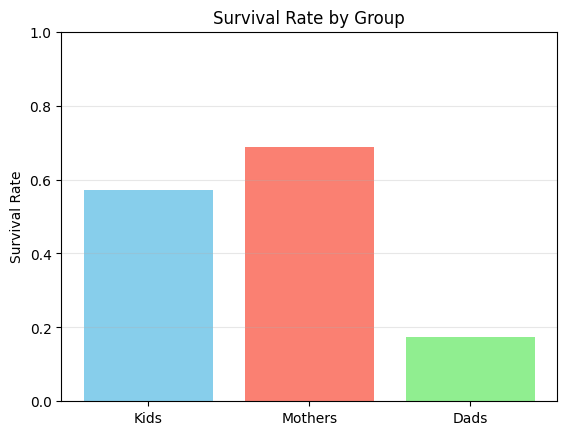

In [235]:
survival_rates = {
    'Kids': kids.mean(),
    'Mothers': mothers.mean(),
    'Dads': dads.mean()
}

# Plotando
plt.bar(survival_rates.keys(), survival_rates.values(), color=['skyblue', 'salmon', 'lightgreen'])
plt.ylabel('Survival Rate')
plt.title('Survival Rate by Group')
plt.ylim(0, 1)
plt.grid(axis='y', alpha=0.3)
plt.show()

Mostrando assim que é possível que a hipótese esteja correta. Não é possível entretanto estabelecer certeza, pois não há no dataset uma relação exata de familias e seus respectivos membros.   
Com tudo observa-se a baixissima taxa de sobrevivência para homens. Vamos explorar isso mais a fundo.

<Axes: xlabel='Sex', ylabel='count'>

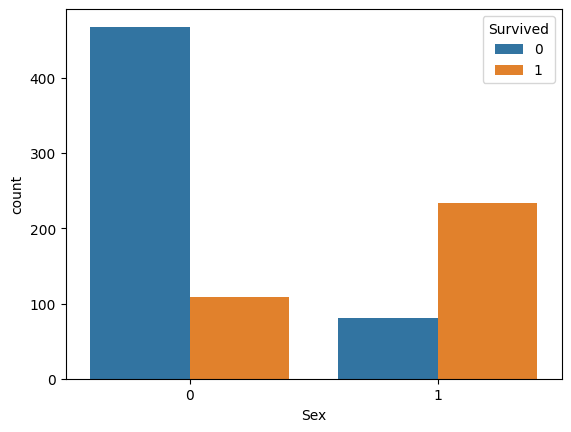

In [236]:
sns.countplot(x='Sex', hue='Survived', data=df)

Por tanto de fato a preferência foi por salvar primeiro mulheres. Vamos ver se o mesmo vale segmentanto em classes de passagem.

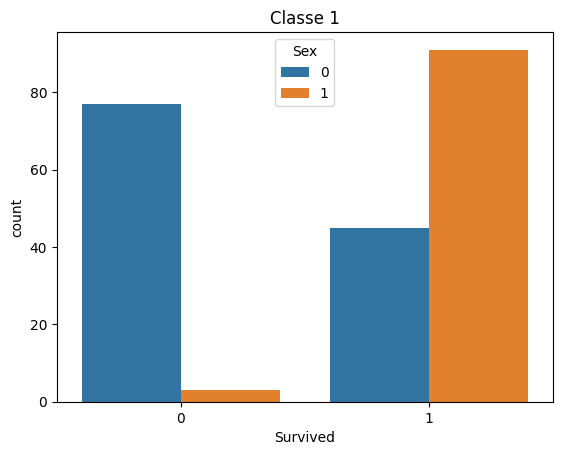

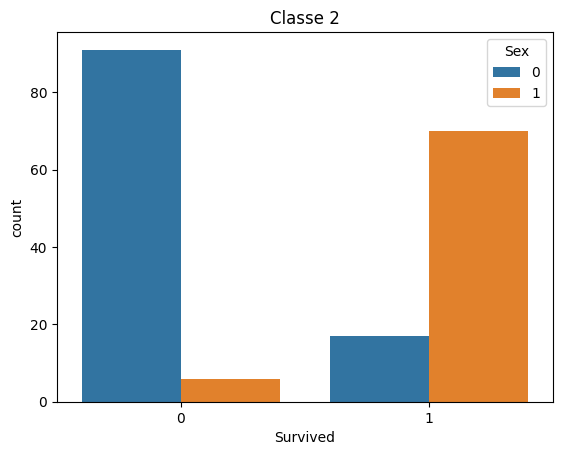

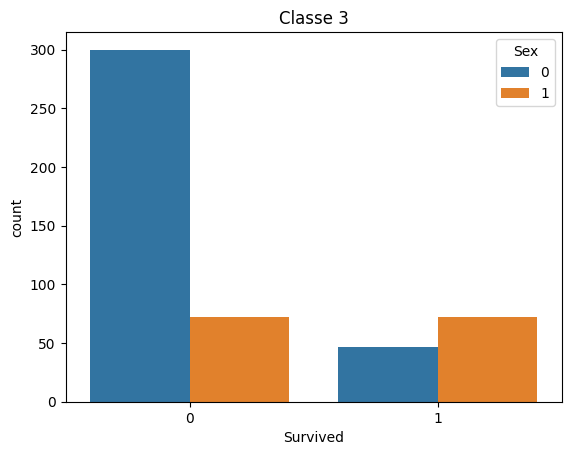

In [244]:
for pclass in sorted(df['Pclass'].unique()):
    sns.countplot(x='Survived', hue='Sex', data=df[df['Pclass'] == pclass])
    plt.title(f'Classe {pclass}')
    plt.show()

Como é possível perceber, para as mulheres 1 segunda classe houveram menos óbitos. Para os homens o mesmo se repete, aqueles com primeira classe tiveram chances bem mais elevadas de sobrevivência. Portanto a classe do passageiro está diretamente atrelado a suas chances do sobrevivência.  
  
Hipótese: Pessoas importantes foram resgatadas com prioridade.  
Para saber se eram de fato importântes, seria nessesária uma análise do título no nome de cada um.

Hipótese: Talvez exista também uma distinção entre as crianças. É possível que filhos de pessoas importantes foram resgatadas com maior prioridade.

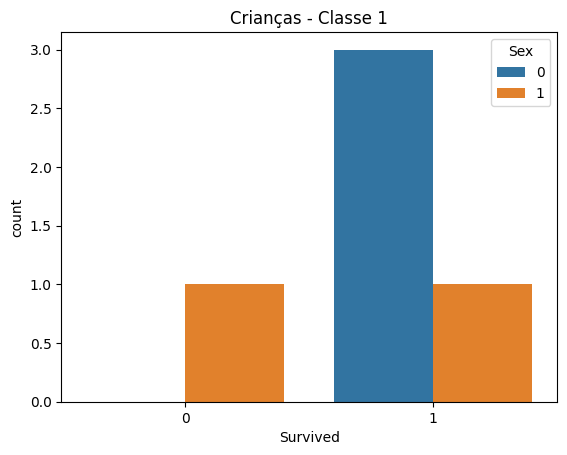

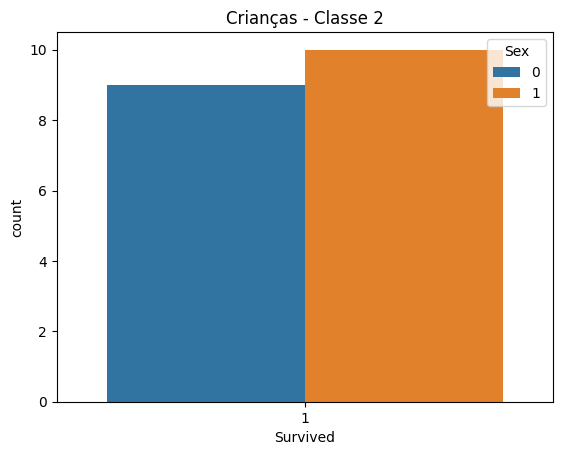

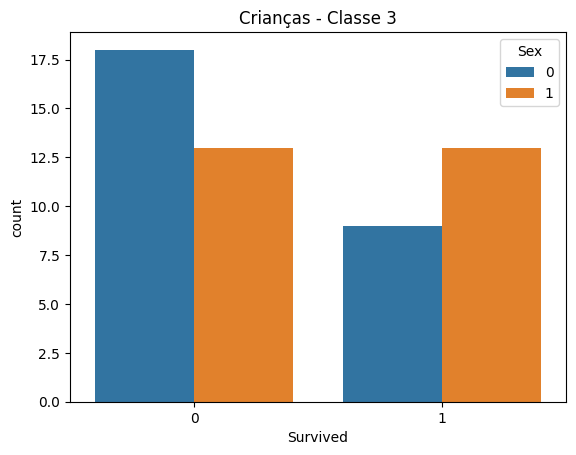

In [245]:
for pclass in sorted(df['Pclass'].unique()):
    subset = df[(df['Pclass'] == pclass) & (df['Age'] <= 14)]
    sns.countplot(x='Survived', hue='Sex', data=subset)
    plt.title(f'Crianças - Classe {pclass}')
    plt.show()

Não é possível determinar se houve distinção, já que a maior parte das crianças é de terceira classe. É notavel que mais meninas sobreviveram.  

Com base nos dados analisados é possível que aqueles com maiores chances de sobreviver são, em ordem decrescente:
1. Mulheres e meninas importantes
2. Demais mulheres e meninas
3. Meninos importantes
4. Demais meninos
5. Homens importantes
6. Demais homens
